# Corpora

Filtern und einzelne Belege anzeigen

In [9]:
from dakoda.corpus import DakodaCorpus
from dakoda.query import annotation, contains, count, startswith, value
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

c1 = DakodaCorpus("data/dulko/essays")
c2 = DakodaCorpus("data/dulko/translations")
c3 = DakodaCorpus("data/falko_koex")
c4 = DakodaCorpus("data/merlin")
c5 = DakodaCorpus("data/mult")
c6 = DakodaCorpus("data/petersen/L1")
c7 = DakodaCorpus("data/petersen/L2")
c8 = DakodaCorpus("data/swiko_wtld/DaF")
c9 = DakodaCorpus("data/swiko_wtld/D_LoS")

for corpus in [c1, c2, c3, c4, c5, c6, c7, c8, c9]: 
    print(f'Corpus {corpus.name} contains {len(corpus)} documents')
    # corpus._build_index(force_rebuild=True)


Corpus essays contains 34 documents
Corpus translations contains 30 documents
Corpus falko_koex contains 107 documents
Corpus merlin contains 1033 documents
Corpus mult contains 585 documents
Corpus L1 contains 192 documents
Corpus L2 contains 177 documents
Corpus DaF contains 544 documents
Corpus D_LoS contains 346 documents


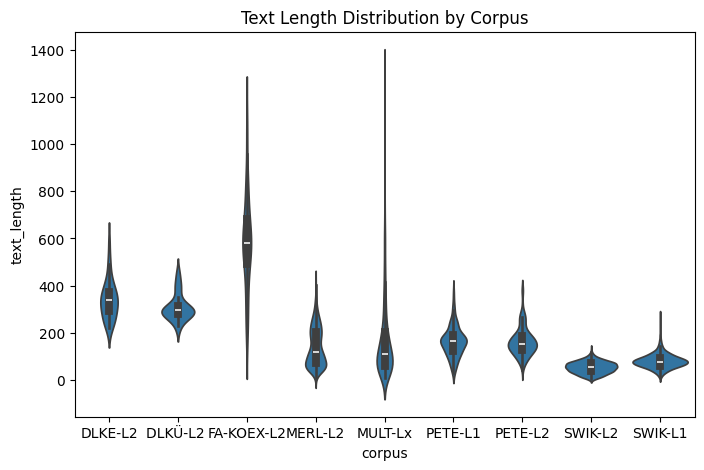

In [12]:
data = []
for corpus in [c1, c2, c3, c4, c5, c6, c7, c8, c9]:
    corpus_name =  corpus.random_doc().meta.corpus.subcorpus.corpus_subcorpus_signet
    
    for doc in corpus:
        meta = doc.meta
        data.append({
            'corpus': corpus_name,
            'text_length': meta.text.text_tokenCount
        })
    
df = pl.DataFrame(data)
    
plt.figure(figsize=(8,5))
sns.violinplot(x='corpus', y='text_length', data=df)
plt.title("Text Length Distribution by Corpus")
plt.show()

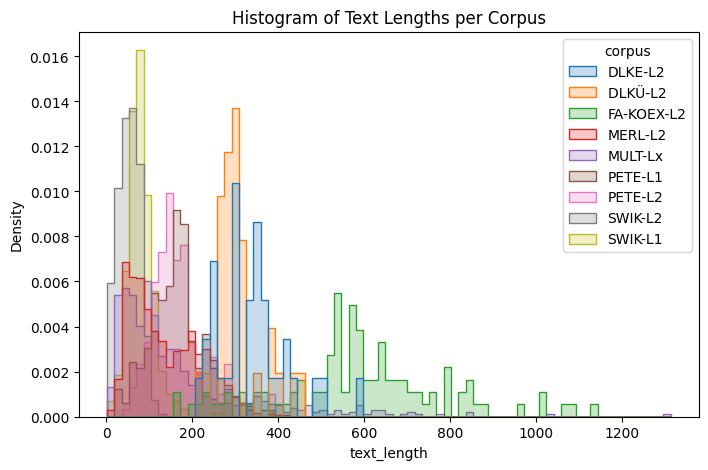

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="text_length", hue="corpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Text Lengths per Corpus")
plt.show()